In [236]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_colwidth', None)

# Gather Data


In [291]:
df = pd.read_csv('./Data/survey_results_public.csv')
# df['DeveloperType'].head()

In [292]:
df.YearsCodedJob.unique()

array([nan, '20 or more years', '9 to 10 years', '10 to 11 years',
       '8 to 9 years', '7 to 8 years', '11 to 12 years', '15 to 16 years',
       '1 to 2 years', '3 to 4 years', '12 to 13 years',
       'Less than a year', '5 to 6 years', '16 to 17 years',
       '13 to 14 years', '6 to 7 years', '2 to 3 years', '17 to 18 years',
       '4 to 5 years', '14 to 15 years', '18 to 19 years',
       '19 to 20 years'], dtype=object)

Fetch unique developer types and categorize them

In [238]:

df_developer = df[['DeveloperType']].dropna()

df_developer['Developer_Type'] = df_developer['DeveloperType'].str.split(';')
df_developer['Developer_Type'] = df_developer['Developer_Type'].apply(lambda x: [i.strip() for i in x] if isinstance(x,pd.Series) else x)
df_list = df_developer['Developer_Type'].explode().dropna()
df_list = df_list[df_list != '']

unique_values = df_list.unique()
# unique_values

Developer = ['Mobile developer', 'Graphics programming', 'Web developer', 'Embedded applications/devices developer', 'Graphic designer', 'Desktop applications developer']
Admin = ['Database administrator', 'Systems administrator']
Data_Scientist = ['Data scientist', 'Machine learning specialist', 'Developer with a statistics or mathematics background']
Tester = ['Quality assurance engineer']
other = ['Other', 'DevOps specialist']


Fetch unique non developer types and categorize them

In [239]:
df_nondeveloper = df[['NonDeveloperType']].dropna()

df_nondeveloper['NonDeveloper_Type'] = df_nondeveloper['NonDeveloperType'].str.split(';')
df_nondeveloper['NonDeveloper_Type'] = df_nondeveloper['NonDeveloper_Type'].apply(lambda x: [i.strip() for i in x] if isinstance(x,pd.Series) else x)
df_list_nd = df_nondeveloper['NonDeveloper_Type'].explode().dropna()
df_list_nd = df_list_nd[df_list_nd != '']

unique_values = df_list_nd.unique()
unique_values

Analyst = ['Data scientist', 'Analyst or consultant', 'Designer or illustrator']
Manager = ['C-suite executive', 'Product manager', 'Marketing or sales manager']
Educator = ['Educator or academic']
other = ['Other', 'Elected official']

Function definition to generate a column with categorized developer and non developer

In [240]:
def check_skill_developer(item_str):
    if item_str is None:
        return 'No Data'
    elif any(val in item_str for val in Developer):
        return 'Developer'
    elif any(val in item_str for val in Admin):
        return 'Admin'
    elif any(val in item_str for val in Data_Scientist):
        return 'Data_Scientist'
    elif any(val in item_str for val in Tester):
        return 'Developer'
    elif any(val in item_str for val in other):
        return 'other'
    
def check_skill_nondeveloper(item_str):
    if item_str is None:
        return 'No Data'
    elif any(val in item_str for val in Analyst):
        return 'Analyst'
    elif any(val in item_str for val in Manager):
        return 'Manager'
    elif any(val in item_str for val in Educator):
        return 'Educator'
    elif any(val in item_str for val in other):
        return 'other'


In [241]:
df['Professional'].unique()

array(['Student', 'Professional developer',
       'Professional non-developer who sometimes writes code',
       'Used to be a professional developer', 'None of these'],
      dtype=object)

# Data Preparation
Generated more common data for usage, remove null/nan and filter for full time employee and professionals

In [278]:
df_employee = df[df['EmploymentStatus']=='Employed full-time']

years = {'Less than a year' : 0,
        '1 to 2 years' : 1, 
        '2 to 3 years' : 2,
        '3 to 4 years' : 3, 
        '4 to 5 years' : 4, 
        '5 to 6 years' : 5, 
        '6 to 7 years' : 6, 
        '7 to 8 years' : 7, 
        '8 to 9 years' : 8, 
        '9 to 10 years' : 9, 
        '10 to 11 years' : 10, 
        '11 to 12 years' : 11, 
        '12 to 13 years' : 12,
        '13 to 14 years' : 13, 
        '14 to 15 years' : 14, 
        '15 to 16 years' : 15, 
        '16 to 17 years' : 16,
        '17 to 18 years' : 17, 
        '18 to 19 years' : 18, 
        '19 to 20 years' : 19, 
        '20 or more years' : 20,
        np.nan : -1}

data_employee = df_employee.reset_index()
data_employee['YearsCodedJob'] = data_employee['YearsCodedJob'].apply(lambda x: years[x])
data_employee['YearsCodedJob'] = pd.to_numeric(data_employee['YearsCodedJob'])

# We erase the points with -1 since they were the placeholders for -1
data_employee = data_employee[data_employee['YearsCodedJob'] != -1]

data_employee.YearsCodedJob.unique()
data_employee['YearsCodedJob'].head(2)

0    20
1     9
Name: YearsCodedJob, dtype: int64

developer dataframe preparation

In [281]:

df_developer = data_employee[data_employee['Professional']=='Professional developer']

df_developer = df_developer.dropna(subset=['DeveloperType'])
df_developer['Developer_Type'] = df_developer['DeveloperType'].apply(check_skill_developer)

df_developer.head(2)

,index,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Developer_Type
0,2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","10,000 or more employees",Publicly-traded corporation,20 or more years,20,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,Somewhat agree,Disagree,Somewhat agree,Agree,Disagree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,British pounds sterling (£),Neither underpaid nor overpaid,Spaces,Not very important,Self-taught; Coding competition; Hackathon; Open source contributions,Official documentation; Trade book; Textbook; Stack Overflow Q&A; Non-Stack online communities; Company internal community; Friends network; Built-in help; Other,NaN,NaN,9:00 AM,Java; PHP; Python,C; Python; Rust,NaN,NaN,MySQL,NaN,NaN,NaN,Sublime Text; Vim; IntelliJ,Turn on some music,Agile; Lean; Scrum; Extreme; Pair; Kanban,Mercurial,Multiple times a day,Agree,Disagree,Disagree,Agree,Agree,Disagree,Somewhat agree,Customer satisfaction; Benchmarked product performance; Manager's 

non developer dataframe preparation

In [282]:
df_nondeveloper = data_employee[data_employee['Professional']=='Professional non-developer who sometimes writes code']
df_nondeveloper = df_nondeveloper.dropna(subset=['NonDeveloperType'])

df_nondeveloper['NonDeveloper_Type'] = df_nondeveloper['NonDeveloperType'].apply(check_skill_nondeveloper)
df_nondeveloper.head(2)


,index,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,NonDeveloper_Type
1,3,4,Professional non-developer who sometimes writes code,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day each week","10,000 or more employees",Non-profit/non-governmental organization or private school/university,14 to 15 years,9,NaN,NaN,NaN,NaN,Data scientist,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Strongly agree,Disagree,Somewhat agree,Agree,Agree,Agree,Somewhat agree,Strongly disagree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Somewhat agree,Agree,I am actively looking for a job,5.0,Between 2 and 4 years ago,Somewhat important,Somewhat important,Somewhat important,Important,Important,Very important,Important,Very important,Important,Somewhat important,Not very important,Very important,Important,Very important,Very important,Stock options; Annual bonus; Health benefits; Equipment; Private office,Yes,LinkedIn; Other,NaN,"A friend, family member, or former colleague told me",Somewhat important,Somewhat important,Very important,Very important,Somewhat important,Somewhat important,Not very important,Not very important,Important,Very important,NaN,NaN,Spaces,NaN,NaN,NaN,NaN,NaN,9:00 AM,Matlab; Python; R; SQL,Matla

select columns of interest and final dataframe for analysis

In [290]:
# select fields for purpose
cols_developer = ['Respondent','Developer_Type','YearsCodedJob','CareerSatisfaction', 'Salary']
cols_nondeveloper = ['Respondent','NonDeveloper_Type','YearsCodedJob','CareerSatisfaction', 'Salary']

# developer dataframes
data_developer = df_developer[cols_developer]
df_salary_developer = data_developer[~data_developer['Salary'].isna()]
df_CareerSatisfaction_developer = data_developer[~data_developer['CareerSatisfaction'].isna()]

# non developer dataframes
data_nondeveloper = df_nondeveloper[cols_nondeveloper]
df_salary_nondeveloper = data_nondeveloper[~data_nondeveloper['Salary'].isna()]
df_CareerSatisfaction_nondeveloper = data_nondeveloper[~data_nondeveloper['CareerSatisfaction'].isna()]

df_CareerSatisfaction_nondeveloper.head()

,Respondent,NonDeveloper_Type,YearsCodedJob,CareerSatisfaction,Salary
1,4,Analyst,9,6.0,NaN
3,7,Analyst,8,7.0,NaN
6,11,other,11,8.0,NaN
20,29,Manager,13,8.0,NaN
21,30,other,3,6.0,NaN


# Analyze and Visualize
### Question 1: Which Developer type has the highest salary?

Consider the median as our value of comparison for developer type salaries

Text(0.5, 1.0, 'Median of Salaries by Developer type')

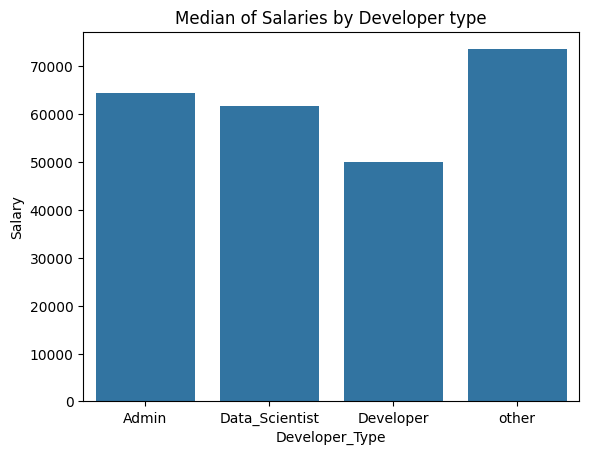

In [286]:
salary_plot = df_salary_developer.groupby(['Developer_Type'])['Salary'].median().reset_index()

sns.barplot(x = 'Developer_Type', y = 'Salary', data = salary_plot)
plt.title('Median of Salaries by Developer type')

> We can easily see that the professional who are not either Admin, data scientist or developer has highest salary. Also, Admins have higher salary than Data scientist and developers.

### Question 2: Which developer type has the highest career satisfaction?


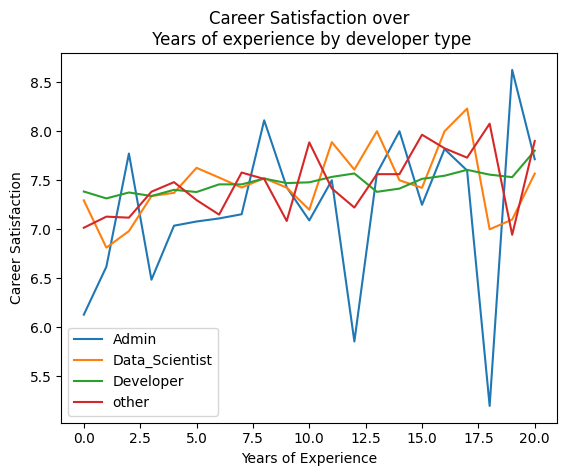

In [288]:
developer_careerSatisfcation_plot = df_CareerSatisfaction_developer.groupby(['YearsCodedJob','Developer_Type'])['CareerSatisfaction'].mean().reset_index()

sns.lineplot(x="YearsCodedJob", y="CareerSatisfaction", hue="Developer_Type", data=developer_careerSatisfcation_plot)
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.title('Career Satisfaction over\n Years of experience by developer type');
plt.legend(loc=3);

>Interesting, Admins are more satisfied with their job and salary but their interest also fluctuating depending upon the year of experience. Also, Developers job satifaction is constant through out their experiences.

### Question 3: Which non developer type has the highest career satisfaction?

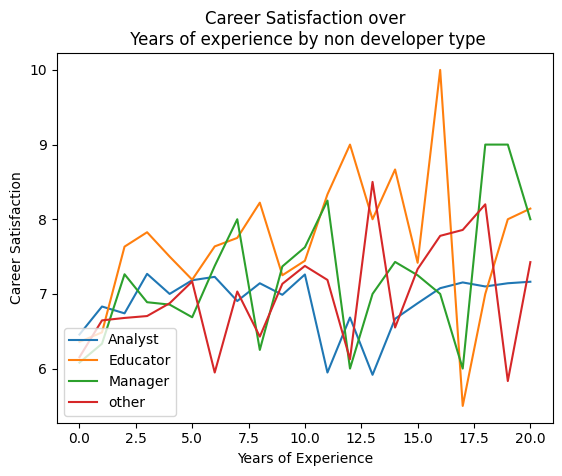

In [289]:
nondeveloper_careerSatisfcation_plot = df_CareerSatisfaction_nondeveloper.groupby(['YearsCodedJob','NonDeveloper_Type'])['CareerSatisfaction'].mean().reset_index()

sns.lineplot(x="YearsCodedJob", y="CareerSatisfaction", hue="NonDeveloper_Type", data=nondeveloper_careerSatisfcation_plot)
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.title('Career Satisfaction over\n Years of experience by non developer type');
plt.legend(loc=3);

>Educators are more satisfied at every stage of working experience and on the other hand Analyst satisfaction is declining over the increase of work experience